# Back Propagation Neural Network

### A Framework of Back Propagation Neural Network

Just for the purpose of demostration

Author: Zihao Chen

Date: 2019-6-26

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
class Layer():
    # a layer of BP Neural Network
    def __init__(self, numofunits, input_label=False, output_label=False):
        self.numofunits = numofunits
        self.input_label = input_label
        self.output_label = output_label
        self.value = np.asmatrix(np.zeros(numofunits)).T
        self.delta = np.asmatrix(np.zeros(numofunits)).T

In [28]:
class BPNN_model():
    # a BPNN model
    def __init__(self, input_size=0, output_size=0, learning_rate=0.1, reg_lambda=1):
        self.input_size = input_size
        self.output_size = output_size
        self.layers = []
        input_layer = Layer(self.input_size, input_label=True)
        self.layers.append(input_layer)
        self.all_Theta = []


    def addlayer(self, layer):
        self.layers.append(layer)


    def save_model(self, all_Theta):
        self.all_Theta = all_Theta

    #Input a test set and generate an output
    def inference(self, test_set):
        m, n = np.shape(test_set)
        num_of_layers = len(self.layers)
        if n != self.input_size:
            print("Error: The size of the testset doesn't match the training set.")
        elif self.all_Theta == []:
            print("Please train the model before do the inference!")
        else:
            input_x = np.asmatrix(test_set)
            act_mat = input_x
            for l in range(num_of_layers-1):
                z = np.hstack((np.matrix(np.ones(m)).T, act_mat)) * self.all_Theta[l].T
                act_mat = sigmoid(z)
            return act_mat > 0.5 

    #!!! output layer will be automatically added
    def train(self, training_set, max_iter=10000, learning_rate=0.1, reg_lambda=1, reset_output=False):
        #first we initialize the theta
        output_size = self.output_size
        if reset_output == True:
            output_layer = Layer(output_size, output_label=True)
            self.layers.append(output_layer)
        num_of_layers = len(self.layers)
        label_count = 0
        for l in range(num_of_layers):
            if self.layers[l].output_label == True:
                label_count += 1
        if label_count != 1:
            print("More than one output layer. You forgot to delete the output layer before adding new hidden layer. Or you didn't set the 'reset_output' to be True")
        elif self.layers[-1].output_label == False:
            print("If you have changed number of layers, please set the parameter 'reset_output' to be True.")
        else: 
            m, n = np.shape(training_set)
            n -= output_size

            #initialize Theta
            capital_theta = []
            for i, layer in enumerate(self.layers):
            # There must be an input layer to be layers[0]
                if i == 0:
                    pass
                else:
                    n_row = layer.numofunits
                    n_col = self.layers[i-1].numofunits + 1
                    theta = np.random.randn(n_row, n_col)
                    theta = np.asmatrix(theta)
                    capital_theta.append(theta)

            #store costFunction in every iteration
            listofJ = []
            #Start training. 
            iteration = 0
            while iteration < max_iter :
                iteration += 1
                costFunc = 0
                #create a list to store DELTA. 
                capital_delta = []
                for theta in capital_theta:
                    delta_l = np.zeros_like(theta)
                    delta_l = np.asmatrix(delta_l)
                    capital_delta.append(delta_l)
                for i in range(m):
                    # For a single sample
                    input_x = np.asmatrix(training_set[i, :n])
                    input_x = input_x.T             
                    lable_y = np.asmatrix(training_set[i, n:])
                    lable_y = lable_y.T
                    self.layers[0].value = input_x
                    #Feedforward propagation
                    for l in range(len(capital_theta)):
                        self.layers[l].value = np.vstack((np.matrix([[1]]), self.layers[l].value))
                        #matrix multiplication
                        self.layers[l+1].value = capital_theta[l] * self.layers[l].value
                        #activate
                        self.layers[l+1].value = sigmoid(self.layers[l+1].value)
                    output_y = self.layers[num_of_layers-1].value
                    #Get the cost           
                    costFunc += - lable_y.T * np.log(output_y) - \
                                (1 - lable_y).T * np.log(1 - output_y)

                    #Backward propagation
                    self.layers[num_of_layers-1].delta = output_y - lable_y
                    for l in np.arange(num_of_layers-2, 0, -1):
                        self.layers[l].delta = capital_theta[l].T * self.layers[l+1].delta
                        self.layers[l].delta = np.multiply(self.layers[l].delta, 
                                            np.multiply(self.layers[l].value, (1 - self.layers[l].value)))
                    for l in np.arange(num_of_layers-1):
                        if l == num_of_layers - 2:
                            capital_delta[l] += self.layers[l+1].delta * self.layers[l].value.T
                        else:
                            capital_delta[l] += self.layers[l+1].delta[1:, :] * self.layers[l].value.T
                #Add regularization term
                sumTheta = 0
                for theta in capital_theta:
                    sumTheta += np.sum(np.multiply(theta, theta))
                costFunc += reg_lambda * sumTheta / 2
                costFunc = costFunc / m
                costFunc = np.asscalar(costFunc)
                print("costFunction: ", costFunc)
                listofJ.append(costFunc)
                #Calculate the gradient
                grad_D = []
                for l in range(num_of_layers-1):
                    grad_l = capital_delta[l] / m
                    grad_l[:, 1:] += reg_lambda * capital_theta[l][:, 1:] / m
                    grad_D.append(grad_l)
                #gradient descending
                    capital_theta[l] = capital_theta[l] - learning_rate * grad_l
        self.save_model(capital_theta)
        listofJ = np.squeeze(listofJ)#no need to squeeze any more
        plt.plot(range(max_iter), listofJ)

costFunction:  7.261243741566516
costFunction:  7.1299561722548095
costFunction:  7.023016037784624
costFunction:  6.922942644398734
costFunction:  6.827823015917004
costFunction:  6.737186182222895
costFunction:  6.650527087411865
costFunction:  6.56744352987917
costFunction:  6.487568396037101
costFunction:  6.410586709301343
costFunction:  6.3362209267039225
costFunction:  6.264226560766792
costFunction:  6.194384004337582
costFunction:  6.126494866258007
costFunction:  6.060379954636053
costFunction:  5.995878901860362
costFunction:  5.932849531973357
costFunction:  5.871166730474056
costFunction:  5.81072087043406
costFunction:  5.751416270785871
costFunction:  5.693169922127693
costFunction:  5.63591052791754
costFunction:  5.579577708105676
costFunction:  5.524121109321337
costFunction:  5.4694991076071435
costFunction:  5.415676903626979
costFunction:  5.362624162779676
costFunction:  5.310312770870499
costFunction:  5.25871536018948
costFunction:  5.207804864907189
costFunctio

costFunction:  0.8665271176908215
costFunction:  0.861357245717834
costFunction:  0.8562412497851013
costFunction:  0.8511786201555748
costFunction:  0.8461688478831327
costFunction:  0.8412114240066109
costFunction:  0.8363058389127787
costFunction:  0.831451581873172
costFunction:  0.826648140753115
costFunction:  0.8218950018853968
costFunction:  0.8171916500962212
costFunction:  0.8125375688673374
costFunction:  0.8079322406157908
costFunction:  0.8033751470713901
costFunction:  0.7988657697317325
costFunction:  0.794403590375207
costFunction:  0.7899880916136773
costFunction:  0.785618757468292
costFunction:  0.7812950739539076
costFunction:  0.7770165296597557
costFunction:  0.7727826163161392
costFunction:  0.768592829338954
costFunction:  0.7644466683456765
costFunction:  0.760343637638051
costFunction:  0.7562832466480647
costFunction:  0.7522650103448979
costFunction:  0.7482884496013952
costFunction:  0.7443530915192618
costFunction:  0.7404584697126555
costFunction:  0.7366

costFunction:  0.40651043294303724
costFunction:  0.4060701632536926
costFunction:  0.40563370030513096
costFunction:  0.405201001929124
costFunction:  0.4047720264616583
costFunction:  0.40434673273466415
costFunction:  0.40392508006836536
costFunction:  0.4035070282643813
costFunction:  0.4030925375997142
costFunction:  0.40268156882175193
costFunction:  0.4022740831444256
costFunction:  0.4018700422456446
costFunction:  0.4014694082661424
costFunction:  0.40107214380984685
costFunction:  0.4006782119458893
costFunction:  0.40028757621234734
costFunction:  0.39990020062180726
costFunction:  0.39951604966880966
costFunction:  0.3991350883392236
costFunction:  0.3987572821215696
costFunction:  0.39838259702028067
costFunction:  0.39801099957086533
costFunction:  0.3976424568568943
costFunction:  0.3972769365286997
costFunction:  0.3969144068236317
costFunction:  0.3965548365876756
costFunction:  0.39619819529818145
costFunction:  0.3958444530874203
costFunction:  0.39549358076662217
co

costFunction:  0.36000991097457136
costFunction:  0.3599356943009112
costFunction:  0.3598618905603947
costFunction:  0.3597884971725867
costFunction:  0.35971551156942
costFunction:  0.35964293119403096
costFunction:  0.35957075349965933
costFunction:  0.3594989759486117
costFunction:  0.35942759601129004
costFunction:  0.3593566111652833
costFunction:  0.35928601889452333
costFunction:  0.35921581668850316
costFunction:  0.35914600204156083
costFunction:  0.35907657245222196
costFunction:  0.35900752542260855
costFunction:  0.35893885845790535
costFunction:  0.35887056906589004
costFunction:  0.35880265475652107
costFunction:  0.35873511304158506
costFunction:  0.3586679414344025
costFunction:  0.3586011374495892
costFunction:  0.35853469860287424
costFunction:  0.35846862241097055
costFunction:  0.3584029063915001
costFunction:  0.3583375480629678
costFunction:  0.35827254494478766
costFunction:  0.35820789455735363
costFunction:  0.3581435944221588
costFunction:  0.3580796420619569

costFunction:  0.34934913815981244
costFunction:  0.34932146225053984
costFunction:  0.3492938839588045
costFunction:  0.3492664031232213
costFunction:  0.3492390195750839
costFunction:  0.3492117331385427
costFunction:  0.34918454363078893
costFunction:  0.34915745086224403
costFunction:  0.3491304546367536
costFunction:  0.3491035547517833
costFunction:  0.3490767509986182
costFunction:  0.34905004316256344
costFunction:  0.3490234310231465
costFunction:  0.34899691435431845
costFunction:  0.34897049292465865
costFunction:  0.34894416649757587
costFunction:  0.3489179348315114
costFunction:  0.34889179768014145
costFunction:  0.3488657547925784
costFunction:  0.34883980591357205
costFunction:  0.34881395078371086
costFunction:  0.3487881891396213
costFunction:  0.3487625207141691
costFunction:  0.3487369452366584
costFunction:  0.3487114624330315
costFunction:  0.3486860720260692
costFunction:  0.34866077373559023
costFunction:  0.348635567278651
costFunction:  0.3486104523697468
cos

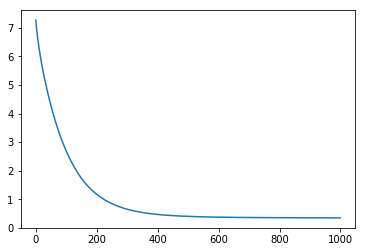

In [29]:
m = 200
data = np.asmatrix(np.random.randn(m, 100))
label = np.asmatrix(np.random.randint(2, size=m))
dataset = np.hstack((data, label.T))
#construct the model
mymodel = BPNN_model(input_size=100, output_size=1)
hiddenlayer = Layer(25)
mymodel.addlayer(hiddenlayer)
mymodel.train(dataset, max_iter=1000, learning_rate=1, reset_output=True)

In [30]:
dataset = dataset[:, :100]
y = mymodel.inference(dataset)
accuracy = (y == label.T)
print("Train accuracy: ", accuracy.mean())
#test the model
test_set = np.random.randn(10, 100)
y = mymodel.inference(test_set)
print(y)

Train accuracy:  1.0
[[ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]]
